In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
puntos = np.array([[0.0, 0.8554428669760865],
 [0.10256410256410256, 0.8192503889643609],
 [0.20512820512820512, 0.9106698108197717],
 [0.3076923076923077, 0.8712405328999302],
 [0.41025641025641024, 1.028882810913172],
 [0.5128205128205128, 0.9042429634802972],
 [0.6153846153846154, 0.855131704289422],
 [0.717948717948718, 0.8320615040511042],
 [0.8205128205128205, 0.5404161442504423],
 [0.923076923076923, 0.4607411363876057],
 [1.0256410256410255, 0.5230079911073856],
 [1.1282051282051282, 0.4319333734735373],
 [1.2307692307692308, 0.3194709855419703],
 [1.3333333333333333, 0.3176511643072673],
 [1.435897435897436, 0.08845060273327107],
 [1.5384615384615383, -0.1118729194358061],
 [1.641025641025641, -0.05123505155215124],
 [1.7435897435897436, -0.2758484321392249],
 [1.846153846153846, -0.3354753113897514],
 [1.9487179487179487, -0.26956032827356446],
 [2.051282051282051, -0.571247853583287],
 [2.1538461538461537, -0.7087933751789464],
 [2.2564102564102564, -0.7346123839017604],
 [2.358974358974359, -0.9422578154572859],
 [2.4615384615384617, -0.6839691792454056],
 [2.564102564102564, -0.9525757587137708],
 [2.6666666666666665, -0.8747644889180131],
 [2.769230769230769, -0.9126743380349072],
 [2.871794871794872, -1.0825927238281552],
 [2.9743589743589745, -1.0103075868775828],
 [3.0769230769230766, -0.907399219424252],
 [3.1794871794871793, -0.851996743383459],
 [3.282051282051282, -0.9446601118164999],
 [3.3846153846153846, -1.0173310927863406],
 [3.4871794871794872, -0.8906772736257376],
 [3.5897435897435894, -0.896632562845944],
 [3.692307692307692, -0.8524291153089643],
 [3.7948717948717947, -0.6563668686292993],
 [3.8974358974358974, -0.8565509469076233],
 [4.0, -0.6052319246737182]])

In [ ]:
def lagrange(x, puntos):
    '''
    Interpola una función que pasa por n puntos como un polinomio
    de Lagrange y lo evalúa en el punto x. Los puntos deben ser
    dados como una lista de tuplas (xi, f(xi)).
    '''
    Lis = np.ones(len(puntos))
    fs = np.ones(len(puntos))
    for i in range(len(puntos)):
        fs[i] = puntos[i][1]
        for j in range(len(puntos)):
            if j != i:
                Lis[i] *= (x - puntos[j][0])/(puntos[i][0] - puntos[j][0])

    return sum(fs*Lis)

In [ ]:
def spline_coefs(puntos):
    '''Calcula los coeficientes para realizar una spline cúbica según los puntos entregados.
    Estos puntos debe ser una lista o tupla de la forma [(xi), (f(xi))]'''

    n = len(puntos) - 1

    h = np.zeros(n)
    for i in range(n):
        h[i] = puntos[i + 1][0] - puntos[i][0]

    a = puntos[:,1]
    alpha = np.zeros(n - 1)
    for i in range(1, n):
        alpha[i-1] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])

    # Se resuelve un sistema de ecuaciones:
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    for i in range(1, n):
        l[i] = 2*(puntos[i+1][0] - puntos[i-1][0]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i-1] - h[i-1]*z[i-1])/l[i]
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    for j in range(n-1,-1,-1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])

    return a, b, c, d

def spline_eval(x, coefs, puntos):
    '''Esta función realiza la interpolación de la función que pasa por n puntos evaluados en x.
    Para ello se necesitan los coeficientes de la función anterior'''

    def find_ind(x, puntos):
       for i in range(len(puntos)):
          if x < puntos[i,0] and i != 0:
              return i-1
    if x >= puntos[-1,0]:
        return puntos[-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    i = find_ind(x, puntos)
    a, b, c, d = coefs
    return (a[i] + b[i]*(x - puntos[i][0]) + \
            c[i]*(x - puntos[i][0])**2 + d[i]*(x - puntos[i][0])**3)

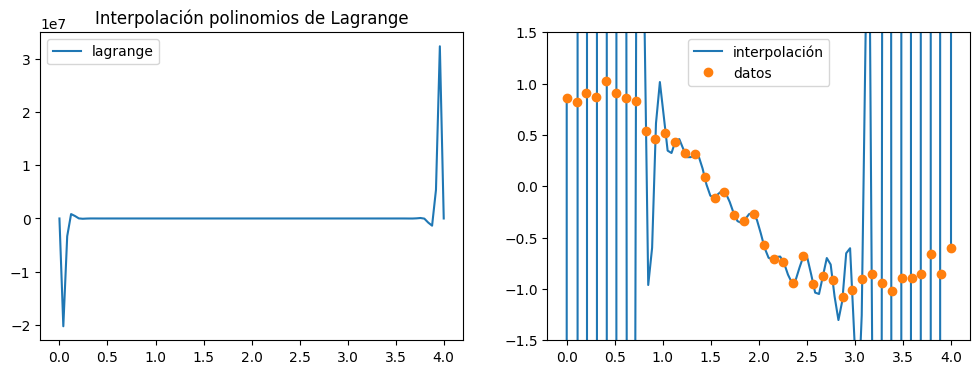

In [ ]:
x = np.linspace(0, 4, 100)  # Valores de x a interpolar
interp = [lagrange(xi, puntos) for xi in x] #resultados de las interpolaciones para diferentes x

#graficamos la interpolación con lagrange y los puntos originales.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x, [lagrange(xi, puntos) for xi in x], label='lagrange')
plt.title( 'Interpolación polinomios de Lagrange')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x,interp, label='interpolación')
plt.ylim(-1.5, 1.5)
plt.plot(puntos[:,0], puntos[:,1], 'o', label='datos')
plt.legend()

Los polinomios de lagrange de alto orden tienen problemas al intentar interpolar una función. Al tener 40 puntos, el polinomio es de orden 39, alcanzdo oscilaciones extremadamente grandes, lo que genera un error muy grande. Por esto, en la gráfica se tuvo que restringir lo que se muestra en el eje y para poder verificar que la interpolación efectivamente pasara por los puntos indicados.
Por lo tanto, los polinomios de lagrange son una mala aproximación.


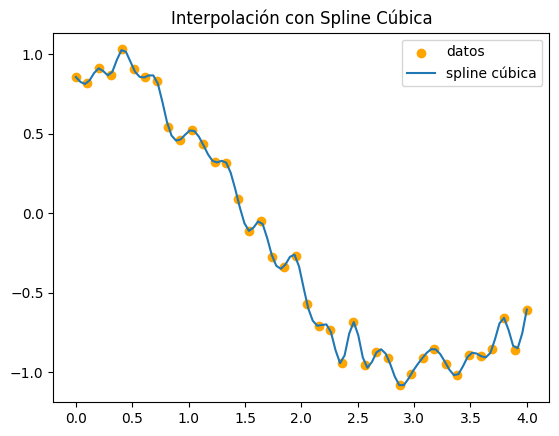

In [ ]:

coefs= spline_coefs(puntos) #calcula los coeficientes para la spline cúbica

spline = [spline_eval(xi, coefs, puntos) for xi in x] #realiza la interpolación

#graficamos la interpolación y los puntos originales
plt.scatter(puntos[:,0], puntos[:,1], label='datos', color='orange')
plt.plot(x, spline, label='spline cúbica')

plt.title('Interpolación con Spline Cúbica')
plt.legend()

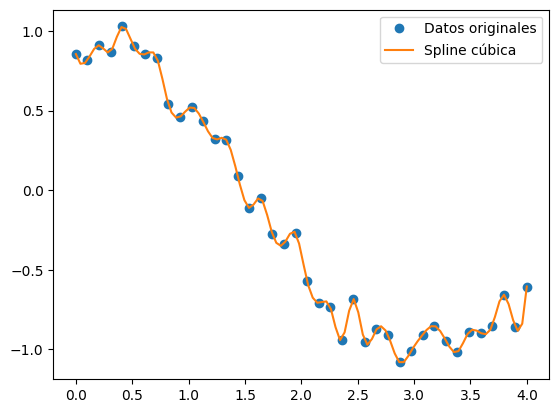

In [ ]:
#También se puede hacer la spline cúbica con scipy, el resultado es lo mismo de arriba

from scipy.interpolate import interp1d
#se van a separar los elementos de los puntos en x e y para poder usarlos en la función interp1d de scipy
x1 = puntos[:, 0]
y1 = puntos[:, 1]
f = interp1d(x1, y1, kind='cubic') # función de scipy que realiza la interpolación con cubic spline sobre los puntos entregados

plt.plot(x1, y1, 'o', label='Datos originales')
plt.plot( x, f(x), '-', label='Spline cúbica')
plt.legend()
plt.show()

La spline cúbica se ajusta bien a los datos sin grandes variaciones, es mucho más estable que la interpolación con polinomios de lagrange. Además de ser más estable, también es continua y derivable

La spline cúbica es mejor cuando se necesita suavidad y continuidad en las derivadas, mientras que los polinomios de Lagrange hacen que la interpolación pase exactamente por los puntos dados.